<a href="https://www.kaggle.com/code/mrsimple07/airpollution-analysis-for-beginners?scriptVersionId=187419306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution/air_pollution.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/air-pollution/air_pollution.csv')
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,NaN,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,NaN,NaN,NaN,16.0,12.5,14.5,14.4
2,Algiers,Algeria,NaN,NaN,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,NaN,NaN,NaN,7.4,7.3,5.4,5.3
4,Luanda,Angola,NaN,NaN,15.9,13.0,11.0,8.8,8.7


**Exploring the data**

In [3]:
df.shape

(6985, 9)

In [4]:
df.describe()

,2017,2018,2019,2020,2021,2022,2023
count,2133.000000,2304.000000,3648.000000,3860.000000,6199.000000,6985.000000,6985.000000
mean,17.960810,17.412507,14.654418,14.307308,14.088786,12.740318,12.726794
std,17.121626,15.854925,12.513181,11.372024,11.151697,10.742500,10.788555
min,1.900000,2.200000,1.900000,2.200000,1.500000,0.200000,0.300000
25%,8.700000,8.700000,7.600000,8.100000,8.000000,7.000000,7.000000
50%,11.800000,11.900000,10.516667,10.300000,10.500000,9.300000,9.300000
75%,18.500000,19.000000,15.500000,16.100000,16.000000,14.100000,14.000000
max,145.600000,135.800000,110.200000,110.200000,175.900000,97.400000,97.400000


In [5]:
#Checking for missing values
df.isnull().sum()

city          0
country       0
2017       4852
2018       4681
2019       3337
2020       3125
2021        786
2022          0
2023          0
dtype: int64

In [6]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia Herzegovina',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chad',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guyana', 'Honduras',
       'Hong Kong SAR', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast',
       'Japan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
       'Laos', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao S

**Handling the missing data**

In [7]:
#drop rows with all NaN values

df = df.dropna(axis =0)
df.isnull().sum()

city       0
country    0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

As you can see we don't have missing values now. Let's now check the air quality trend of the city Albury over the years.

In [8]:
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
14,Albury,Australia,7.3,7.3,11.0,17.3,11.3,6.9,6.9
17,Bathurst,Australia,6.1,7.0,13.1,8.7,10.3,4.6,4.6
19,Beresfield,Australia,7.6,8.7,13.6,10.6,10.2,5.4,5.4
21,Boat Creek,Australia,5.1,5.5,7.8,5.8,5.0,5.1,5.1
23,Bream Creak,Australia,2.5,4.4,4.3,4.0,3.0,3.3,3.3


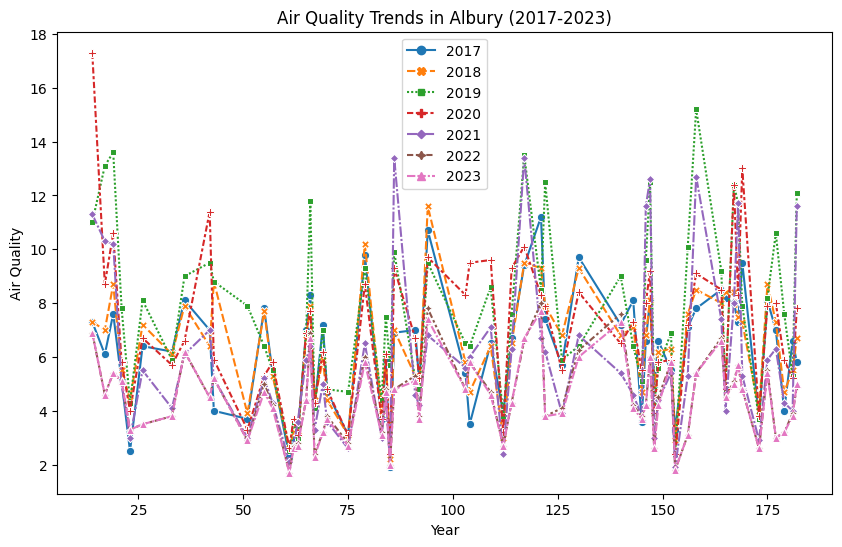

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

check_data = df[df['country']=='Australia']
plt.figure(figsize=(10, 6))
sns.lineplot(data=check_data[["2017", "2018", "2019", "2020", "2021", "2022", "2023"]], markers=True)
plt.title('Air Quality Trends in Albury (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Air Quality')
plt.show()

And now we will see  the correlation between air quality levels in different years:

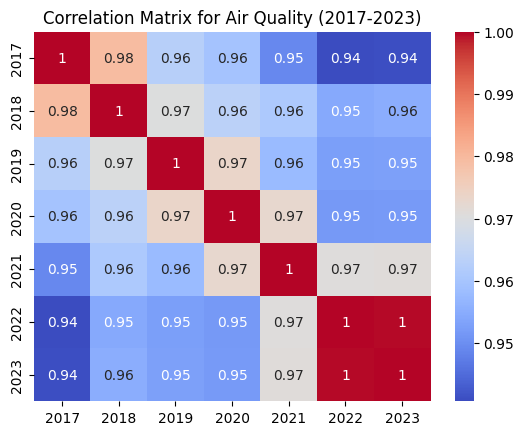

In [10]:
correlation_matrix = df.iloc[:, 2:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Air Quality (2017-2023)')
plt.show()

In this correlation matrix we have 2 most correlated years - 2022 and 2023 whic means they have strong similarity in air quality measurements.

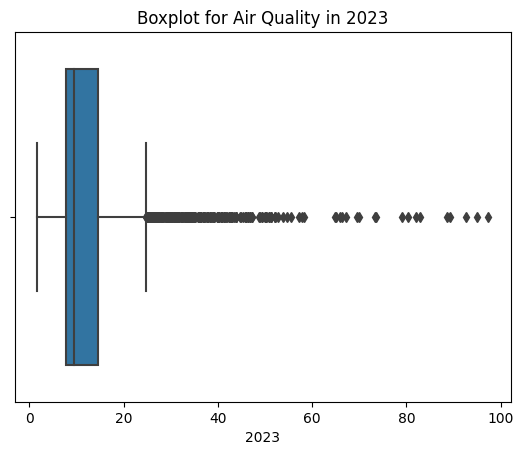

In [11]:
#Checking for Outliers
#BoxPlot for 2023 year

sns.boxplot(x='2023', data=df)
plt.title('Boxplot for Air Quality in 2023')
plt.show()

In [12]:
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
14,Albury,Australia,7.3,7.3,11.0,17.3,11.3,6.9,6.9
17,Bathurst,Australia,6.1,7.0,13.1,8.7,10.3,4.6,4.6
19,Beresfield,Australia,7.6,8.7,13.6,10.6,10.2,5.4,5.4
21,Boat Creek,Australia,5.1,5.5,7.8,5.8,5.0,5.1,5.1
23,Bream Creak,Australia,2.5,4.4,4.3,4.0,3.0,3.3,3.3
